In [1]:
import numpy as np
np.random.seed(2042)

In [60]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
print(len(X))

150


In [4]:
X=X.astype('float32')
print(X.dtype)
print(X.shape)

float32
(150, 2)


In [5]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

In [6]:
X_train = X[rnd_indices[:train_size]]

In [7]:
X_train.shape

(90, 2)

In [8]:
y_train = y[rnd_indices[:train_size]]

In [11]:
y_train.shape

(90,)

In [10]:
y.shape

(150,)

In [12]:
D = 2 # dimensionality
K = 3 # number of classes

In [13]:
W=np.array([[ 0.43433246, -0.66647124, -0.71757054],
       [ 1.0188498 ,  0.41245225, -0.7501844 ]])

In [14]:
b=np.array([[ 0.11330361, -0.23452355, -0.20774285]])

In [15]:
W.shape

(2, 3)

In [16]:
b.shape

(1, 3)

In [17]:
# some hyperparameters
step_size = 0.01

In [18]:
num_examples = X_train.shape[0]
print(num_examples)

90


In [19]:
for iteration in range(5001):
    scores = np.dot(X_train, W) + b
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    
    correct_logprobs = -np.log(probs[range(num_examples),y_train])
    data_loss = np.sum(correct_logprobs)/num_examples
    if iteration % 500 == 0:
        print(iteration, 'loss=',data_loss)
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_train] -= 1
    dscores /= num_examples
    
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X_train.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    if iteration % 500 == 0:
        print(iteration, 'db=',db)
        print('dW=',dW)
        print('')
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db


0 loss= 5.447902401838389
0 db= [[ 0.59406399 -0.28615298 -0.30791101]]
dW= [[ 3.17973972 -1.34526175 -1.83447798]
 [ 1.10140275 -0.43091503 -0.67048771]]

500 loss= 0.8350064987566191
500 db= [[-0.13595679  0.02841431  0.10754247]]
dW= [[ 0.01794235 -0.01436509 -0.00357726]
 [ 0.05473265  0.01235083 -0.06708348]]

1000 loss= 0.6878803486993864
1000 db= [[-0.10042224  0.02081561  0.07960662]]
dW= [[ 0.01573514 -0.01335253 -0.00238261]
 [ 0.04034821  0.01283161 -0.05317983]]

1500 loss= 0.601238102219196
1500 db= [[-0.07766894  0.01412547  0.06354347]]
dW= [[ 0.01331931 -0.01173709 -0.00158222]
 [ 0.03100568  0.01336514 -0.04437082]]

2000 loss= 0.5444498651990036
2000 db= [[-0.06296144  0.00926182  0.05369962]]
dW= [[ 0.01131264 -0.01020736 -0.00110528]
 [ 0.02493899  0.0134161  -0.03835509]]

2500 loss= 0.5038531907192059
2500 db= [[-0.05300457  0.00581147  0.0471931 ]]
dW= [[ 0.00974229 -0.00889482 -0.00084747]
 [ 0.0208332   0.01309477 -0.03392797]]

3000 loss= 0.472923065092548
300

In [20]:
db

array([[-0.03095039, -0.00170694,  0.03265733]])

In [21]:
dW

array([[ 0.00563611, -0.00479963, -0.00083647],
       [ 0.0118245 ,  0.00982887, -0.02165337]])

In [22]:
scores = np.dot(X_train, W) + b

In [23]:
predicted_class = np.argmax(scores, axis=1)

In [24]:
predicted_class.shape

(90,)

In [25]:
np.mean(predicted_class == y_train)

0.9444444444444444

In [26]:
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [28]:
xx.shape

(220, 396)

In [29]:
yy.shape

(220, 396)

In [35]:
xx.ravel()[:5]

array([0.  , 0.02, 0.04, 0.06, 0.08])

In [38]:
yy.ravel()[:5]

array([-0.9, -0.9, -0.9, -0.9, -0.9])

In [34]:
220*396

87120

In [36]:
np.c_[xx.ravel(), yy.ravel()].shape

array([[ 0.  , -0.9 ],
       [ 0.02, -0.9 ],
       [ 0.04, -0.9 ],
       ...,
       [ 7.86,  3.48],
       [ 7.88,  3.48],
       [ 7.9 ,  3.48]])

In [54]:
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b

In [55]:
Z.shape

(87120, 3)

In [56]:
Z = np.argmax(Z, axis=1)

In [57]:
Z.shape

(87120,)

In [51]:
xx.shape

(220, 396)

In [58]:
Z = Z.reshape(xx.shape)

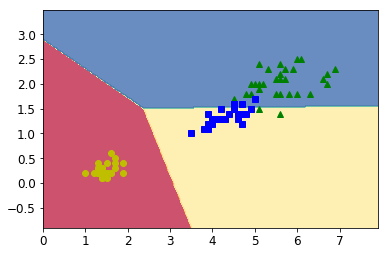

In [68]:
fig = plt.figure()
plt.plot(X_train[y_train==2, 0], X_train[y_train==2, 1], "g^", label="Iris virginica")
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], "bs", label="Iris versicolor")
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], "yo", label="Iris setosa")
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)